<a href="https://colab.research.google.com/github/iesous-kurios/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/GJW_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Import tools for this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style

In [6]:
# read index of dataset
pd.read_csv('/content/Index')

,Index of voting-records
0,02 Dec 1996 135 Index
1,30 Jun 1993 6868 house-votes-84.names
2,30 May 1989 18171 house-votes-84.data


In [0]:
# assign data to a dataframe
# use header argument to avoid losing a row in the 
# missing column row of uploaded file
df = pd.read_csv('/content/house-votes-84.data', header=None)

In [8]:
# get the shape of dataframe(rows, columns)
df.shape

(435, 17)

In [9]:
# print first two rows of data
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


In [10]:
# replace the abstain with NaN
df = df.replace('?', np.NaN)
# replace n with 0
df = df.replace('n', 0)
# replace y with 1
df = df.replace('y', 1)
# print first two rows of data to verify changes
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [0]:
# rename the features/columns into meaningful titles
df.rename(columns={0:'party', 1:'handicapped_infants', 2:'water_project_cost_sharing', 
           3:'adoption_of_the_budget_resolution', 4:'physician_fee_freeze', 
           5:'el_salvador_aid', 6:'religious_groups_in_schools', 7:'anti_satellite_test_ban',
           8:'aid_to_nicaraguan_contras', 9:'mx_missle', 10:'immigration',
           11:'synfuels_corporation_cutback', 12:'education_spending', 13:'superfund_right_to_sue',
           14:'crime', 15:'duty_free_exports', 16:'export_administration_act_south_africa'}, inplace=True)

In [0]:
# split into two separate data frames
# one for repub, one for dem
dem = ['democrat']
repub = ['republican']
df_dem = df[df['party'].isin(dem)]
df_repub = df[df['party'].isin(repub)]

df_merged = df_dem.append(df_repub)

In [13]:
# print first two rows of data to verify column name changes
df_dem.shape

(267, 17)

In [14]:
df.shape

(435, 17)

In [15]:
df_merged.shape

(435, 17)

In [16]:
# print first row of dem dataframe
df_dem.head(1)

,party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missle,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [17]:
# print first row of repub datafram
df_repub.head(1)

,party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missle,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0


In [18]:
for col in df_repub:
  print(pd.crosstab(index=1, columns=df_repub[col]))

party  republican
row_0            
1             168
handicapped_infants  0.0  1.0
row_0                        
1                    134   31
water_project_cost_sharing  0.0  1.0
row_0                               
1                            73   75
adoption_of_the_budget_resolution  0.0  1.0
row_0                                      
1                                  142   22
physician_fee_freeze  0.0  1.0
row_0                         
1                       2  163
el_salvador_aid  0.0  1.0
row_0                    
1                  8  157
religious_groups_in_schools  0.0  1.0
row_0                                
1                             17  149
anti_satellite_test_ban  0.0  1.0
row_0                            
1                        123   39
aid_to_nicaraguan_contras  0.0  1.0
row_0                              
1                          133   24
mx_missle  0.0  1.0
row_0              
1          146   19
immigration  0.0  1.0
row_0                
1             

In [19]:
for col in df_dem:
  print(pd.crosstab(index=1, columns=df_dem[col]))

party  democrat
row_0          
1           267
handicapped_infants  0.0  1.0
row_0                        
1                    102  156
water_project_cost_sharing  0.0  1.0
row_0                               
1                           119  120
adoption_of_the_budget_resolution  0.0  1.0
row_0                                      
1                                   29  231
physician_fee_freeze  0.0  1.0
row_0                         
1                     245   14
el_salvador_aid  0.0  1.0
row_0                    
1                200   55
religious_groups_in_schools  0.0  1.0
row_0                                
1                            135  123
anti_satellite_test_ban  0.0  1.0
row_0                            
1                         59  200
aid_to_nicaraguan_contras  0.0  1.0
row_0                              
1                           45  218
mx_missle  0.0  1.0
row_0              
1           60  188
immigration  0.0  1.0
row_0                
1            139  12

In [20]:
for col in df:
  print(pd.crosstab(index=1, columns=df[col]))

party  democrat  republican
row_0                      
1           267         168
handicapped_infants  0.0  1.0
row_0                        
1                    236  187
water_project_cost_sharing  0.0  1.0
row_0                               
1                           192  195
adoption_of_the_budget_resolution  0.0  1.0
row_0                                      
1                                  171  253
physician_fee_freeze  0.0  1.0
row_0                         
1                     247  177
el_salvador_aid  0.0  1.0
row_0                    
1                208  212
religious_groups_in_schools  0.0  1.0
row_0                                
1                            152  272
anti_satellite_test_ban  0.0  1.0
row_0                            
1                        182  239
aid_to_nicaraguan_contras  0.0  1.0
row_0                              
1                          178  242
mx_missle  0.0  1.0
row_0              
1          206  207
immigration  0.0  1.0
row_0 

In [21]:
df_repub['crime'].mean()

0.9813664596273292

In [0]:
from scipy.stats import ttest_ind

In [0]:
df = df.drop(columns='party')

In [0]:
df_repub = df_repub.drop(columns=['party'])
df_dems = df_dem.drop(columns=['party'])

In [26]:
for col in df_repub:
  print(ttest_ind(df_repub[col], df_dem[col], nan_policy='omit'))

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)
Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)
Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)
Ttest_indResult(statistic=49.36708157301406, pvalue=1.994262314074344e-177)
Ttest_indResult(statistic=21.13669261173219, pvalue=5.600520111729011e-68)
Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
Ttest_indResult(statistic=-12.526187929077842, pvalue=8.521033017443867e-31)
Ttest_indResult(statistic=-18.052093200819733, pvalue=2.82471841372357e-54)
Ttest_indResult(statistic=-16.437503268542994, pvalue=5.03079265310811e-47)
Ttest_indResult(statistic=1.7359117329695164, pvalue=0.08330248490425066)
Ttest_indResult(statistic=-8.293603989407588, pvalue=1.5759322301054064e-15)
Ttest_indResult(statistic=20.500685724563073, pvalue=1.8834203990450192e-64)
Ttest_indResult(statistic=13.51064251060933, pvalue=1.2278581709672758e-34)
Ttest_indResu

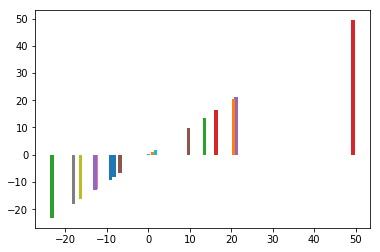

In [27]:

for col in df_repub:
  plt.bar(ttest_ind(df_repub[col], df_dem[col], nan_policy='omit'), ttest_ind(df_repub[col], df_dem[col], nan_policy='omit') );

In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = data[~np.isnan(data)]
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval);

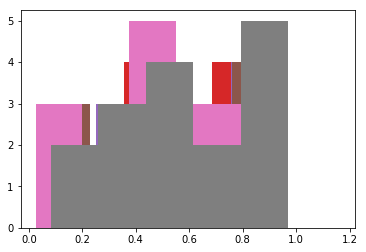

In [50]:
## confidence_interval(df_repub['crime'], confidence=0.95)

mean = []
mean_minus = []
mean_plus = []

# column = ['crime']

for col in df_dems:
  triplemean = confidence_interval(df_dems[col], confidence=0.95)
  mean.append(triplemean[0])
  plt.hist(mean, bins=5)
  mean_minus.append(triplemean[1])
  plt.hist(mean_minus, bins=5)
  mean_plus.append(triplemean[2])
  plt.hist(mean_plus, bins=5)
 




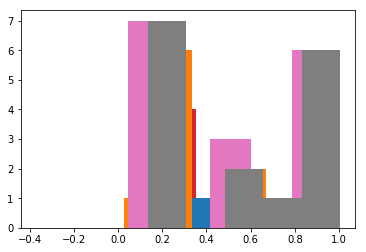

In [56]:
## confidence_interval(df_repub['crime'], confidence=0.95)

mean2 = []
mean_minus2 = []
mean_plus2 = []

# column = ['crime']

for col in df_repub:
  triplemean2 = confidence_interval(df_repub[col], confidence=0.95)
  mean2.append(triplemean2[0])
  plt.hist(mean2, bins=5)
  mean_minus2.append(triplemean2[1])
  plt.hist(mean_minus2, bins=5)
  mean_plus2.append(triplemean2[2])
  plt.hist(mean_plus2, bins=5)
 




In [0]:
df_new_repub = pd.DataFrame(data=[mean2,mean_minus2,mean_plus2], 
                      columns=['1','2','3', '4', '5', '6','7','8','9','10','11','12','13','14','15','16'])

In [0]:
# rename the features/columns into meaningful titles
df_new_repub = df_new_repub.rename(columns={'1':'handicapped_infants', '2':'water_project_cost_sharing', 
           '3':'adoption_of_the_budget_resolution', '4':'physician_fee_freeze', 
           '5':'el_salvador_aid', '6':'religious_groups_in_schools', '7':'anti_satellite_test_ban',
           '8':'aid_to_nicaraguan_contras', '9':'mx_missle', '10':'immigration',
           '11':'synfuels_corporation_cutback', '12':'education_spending', '13':'superfund_right_to_sue',
           '14':'crime', '15':'duty_free_exports', '16':'export_administration_act_south_africa'})

In [0]:
df_new_repub_transposed = df_new_repub.T

In [0]:
df = df.drop(columns='party')

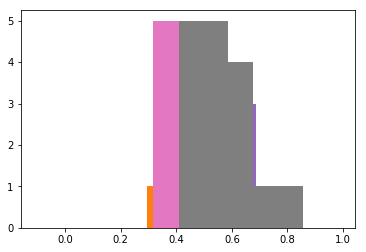

In [45]:
## confidence_interval(df_repub['crime'], confidence=0.95)

mean = []
mean_minus = []
mean_plus = []

# column = ['crime']

for col in df:
  triplemean = confidence_interval(df[col], confidence=0.95)
  mean.append(triplemean[0])
  plt.hist(mean, bins=5)
  mean_minus.append(triplemean[1])
  plt.hist(mean_minus, bins=5)
  mean_plus.append(triplemean[2])
  plt.hist(mean_plus, bins=5)
 

In [0]:
df_new_dems = pd.DataFrame(data=[mean,mean_minus,mean_plus], 
                      columns=['1','2','3', '4', '5', '6','7','8','9','10','11','12','13','14','15','16'])

In [0]:
# rename the features/columns into meaningful titles
df_new_dems = df_new_dems.rename(columns={'1':'handicapped_infants', '2':'water_project_cost_sharing', 
           '3':'adoption_of_the_budget_resolution', '4':'physician_fee_freeze', 
           '5':'el_salvador_aid', '6':'religious_groups_in_schools', '7':'anti_satellite_test_ban',
           '8':'aid_to_nicaraguan_contras', '9':'mx_missle', '10':'immigration',
           '11':'synfuels_corporation_cutback', '12':'education_spending', '13':'superfund_right_to_sue',
           '14':'crime', '15':'duty_free_exports', '16':'export_administration_act_south_africa'})

In [53]:
df_new_dems.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missle,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
1,0.544593,0.438245,0.849944,0.026332,0.164863,0.415392,0.720782,0.783085,0.704394,0.410757,0.444103,0.100595,0.233293,0.291482,0.577569,0.899313
2,0.664710,0.565939,0.926980,0.081776,0.266509,0.538097,0.823620,0.874710,0.811735,0.532208,0.567662,0.188562,0.346072,0.408907,0.697332,0.970957


In [0]:
df_new_dems_transposed = df_new_dems.T

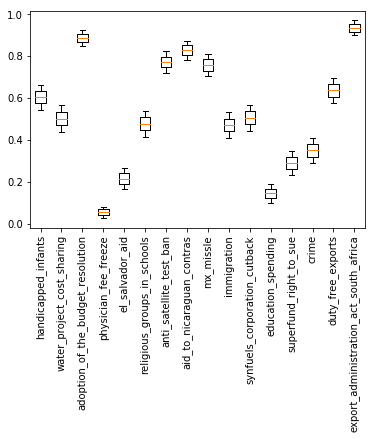

In [55]:
plt.boxplot(df_new_dems_transposed)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], ['handicapped_infants', 'water_project_cost_sharing',
       'adoption_of_the_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missle',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_south_africa'], rotation='vertical');

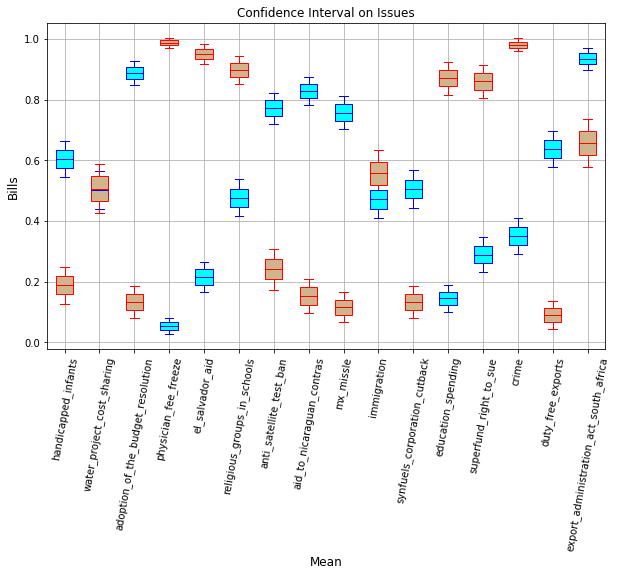

In [63]:
def draw_plot(data, edge_color, fill_color):
  bp = ax.boxplot(data, patch_artist=True)
  
  for element in ['boxes', 'whiskers', 'fliers', 'means',
                 'medians', 'caps']:
    plt.setp(bp[element], color=edge_color)
    
  for patch in bp['boxes']:
    patch.set(facecolor=fill_color)
    
d0 = df_new_dems_transposed
d1 = df_new_repub_transposed
names = ['handicapped_infants', 'water_project_cost_sharing',
       'adoption_of_the_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missle',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_south_africa']

fig, ax = plt.subplots(figsize= (10, 6))
draw_plot(d0, 'blue', 'cyan')
draw_plot(d1, 'red', 'tan')

plt.title('Confidence Interval on Issues')
plt.xlabel('Mean', fontsize= 12)
plt.ylabel('Bills', fontsize = 12)

xtickNames = plt.setp(ax, xticklabels = names)
plt.setp(xtickNames, rotation=80, fontsize=10)

style.use('fivethirtyeight')
plt.grid(True)

In [0]:
df.columns

In [0]:
plt.boxplot(df_new);

In [0]:
print('means of all topics', ':', mean)
print('mean minus interval of all topics', ':',mean_minus)
print('mean plus interval of all topics',':',mean_plus)

In [0]:
mean?

In [0]:
plt.hist(mean, bins=10);

In [0]:
plt.boxplot(mean);

In [0]:
plt.boxplot(mean_minus);

In [0]:
plt.boxplot(mean_plus);

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [66]:
cut_points = [0, 9, 19, 29, 39, 49, 500]
label_names = ['0-9','10-19','20-29','30-39','40-49','50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [67]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [68]:
df = df.sort_values(by='hours_per_week_categories')
# https://github.com/pandas-dev/pandas/issues/25278
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


expected value

In [71]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [72]:
total = contingency_table.loc['All','All']
total

32561

In [73]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


Chi-squared

In [69]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [74]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

2287.190943926107

run x squared test

In [75]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

2287.190943926107 0.0 5 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex. 

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)